# 39) HW 4 Solution



In this assignment, we will start by constructing polynomials using orthogonality with respect to an integral inner product.
For example, given functions $u \left( x \right)$ and $v \left( x \right)$, we define their inner product to be

$$ \left\langle u, w \right\rangle = \int_{-1}^{1} u \left( x \right) v \left( x \right) dx $$

where we use the notation $\left\langle u, w \right\rangle$ to distinguish this continuous inner product from the discrete inner product $u^T v$ of vectors.

<br>

This is known as the $L^2$ inner product on the domain $\left( -1, 1 \right)$, which is a Hilbert space and a [$L^p$ space](https://en.wikipedia.org/wiki/Lp_space).
The study of such generalizations of linear algebraic concepts is called Functional Analysis, and advanced mathematical topic that is used in numerical activity.
We will only need the above definition in this activity.

The inner product induces a norm,

$$ \left\lvert \left\lvert u \right\rvert \right\rvert = \sqrt{\left\langle u, u \right\rangle} $$

The inner product and norm satisfy the usual properties from our Linear Algebra notebook.

## Working with polynomials

We'll develop functions to evaluate, multiply, and integrate polynomials expressed as vectors of coefficients.

In [117]:
display("text/latex", "\$x^2\$")

In [118]:
using LinearAlgebra
using Plots
using Test
default(linewidth=4, legendfontsize=12)

function polystring(p)
    """Construct a string representation of the polynomial.
    
    You don't need to understand this function, it is only
    used to annotate plots and clearly view polynomials.
    """
    join((a == 1 ? "x^$(i-1)" : "$a x^$(i-1)" for (i, a) in enumerate(p) if a ≠ 0), " + ")
end

polystring([1 4 0 6])

"x^0 + 4 x^1 + 6 x^3"

In [119]:
function polydisp(name, p)
    """Display the polynomial with friendly math formatting."""
    
    s = join(('$', "$name(x) = ", polystring(p), '$'))
    display("text/latex", s)
end
    
polydisp("p", [1 4 0 6])

In [120]:
function polyval(p, x)
    """Evaluate function described by coefficients p at point x.
    
    This uses Horner's rule, which evaluates a0 + a1 x + a2 x^2 + a3 x^3 as
    a0 + x * (a1 + x * (a2 + x * (a3))).
    """
    f = one(x) * p[end]
    for a in reverse(p[1:end-1])
        f = a .+ x .* f
    end
    f
end

@test polyval([1 4 0 6], π) ≈ 1 + 4π + 6π^3

Test Passed

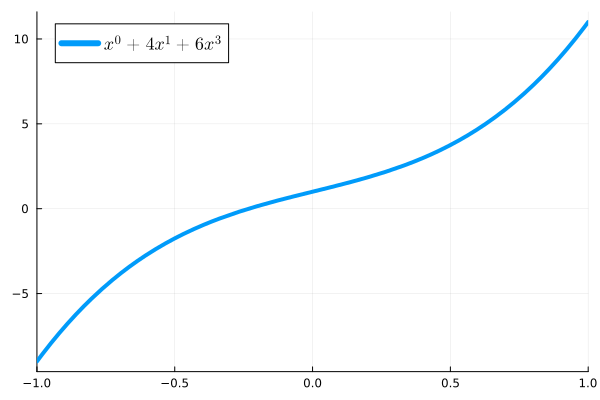

In [121]:
function polyplot(p; label=nothing)
    """Plot a polynomial p(x) defined by its coefficients
      p[1] + p[2]*x^1 + ... + p[n]*x^(n-1)
    where n = length(p).  We evaluate the polynomial using
    our polyval.
    """
    if isnothing(label)
        label = polystring(p)
    end
    plot!(x -> polyval(p, x), xlims=(-1, 1), label=join(('$', label, '$')))
end

plot()
polyplot([1 4 0 6])

## Ex 1. Indefinite integral (15%)

We'll start by implementing `polyint`, which computes the indefinite integral

$$ P \left( x \right) = \int p \left( x \right) dx $$

i.e., $P' \left( x \right) = p \left( x \right)$.
Note that the antiderivative $P \left( x \right)$ is a polynomial determined only up to an integration constant, which you man choose arbitrarily.

<br>

As an example,

$$ \int 1 + 4 x + 6 x^3 = C + x + 2x^2 + \frac{6}{4} x^4 $$

where $C$ can be any value, so the expected behavior is that

`polyint([1 4 0 6]) == [0 1 2 0 6/4]`

The polynomial manipulation functions such as `polyint` are $\mathcal{O} \left( n \right)$ (linear time) operations on lists or arrays.

In [ ]:
function polyint(p)
    """Without using library functions, compute an indefinite integral
    of p(x) expressed as a polynomial of degree 1 higher than the
    degree of p.  The constant of integration may be chosen arbitrarily.
    """
    p = reshape(p, :) # Convert from row or column vector into list
    pint = zeros(length(p) + 1) # Array to hold the indefinite integral
    ### SOLUTION BEGIN
    # pint[1] = 0  # Constant of integration C = 0; could be explicitly set or not, since the entire array is initialized to zero.
    for i in 1:length(p)
        pint[i+1] = p[i] / i
    end
    ### SOLUTION END
    # return a row vector (for easier viewing)
    reshape(pint, 1, :)
end

# Display solution:
p = [1 4 0 6]
polydisp('p', p)
P = polyint(p)
polydisp('P', P)


In [123]:
# Tests:
@test polyint([1 1]) ≈ [0 1 .5]
@test polyint([1 4 0 6]) ≈ [0 1 2 0 6/4]
@test polyint([1 2 3 4]) ≈ [0 1 1 1 1]

Test Passed

## Multiplying polynomials

We need to be able to compute the product of polynomials.
For example,

$$ \left( a_1 + a_2 x + a_3 x^2 \right) \left( b_1 + b_2 x + b_3 x^2 \right) = a_1 b_1 + \left( a_1 b_2 + a_2 b_1 \right) x + \left( a_1 b_3 + a_2 b_2 + a_3 b_1 \right) x^2 + \left( a_2 b_3 + a_3 b_2 \right) x^3 + a_3 b_3 x^4 $$

(You may notice that one-based indexing in Julia is kind of awkward here compared to zero-based indexing usually adopted for polynomials.)

In [124]:
function polymul(p, q)
    """Multiply two polynomials, returning a polynomial."""
    p = reshape(p, :)
    q = reshape(q, :)
    n = length(p) + length(q) - 1
    r = zeros(n)
    for (i, a) in enumerate(p)
        for (j, b) in enumerate(q)
            r[i+j-1] += a * b
        end
    end
    # return a row vector (for easier viewing)
    reshape(r, 1, :)
end

r = polymul([1 2 3], [10, 100])
polydisp('r', r)
@show r;

r = [10.0 120.0 230.0 300.0]


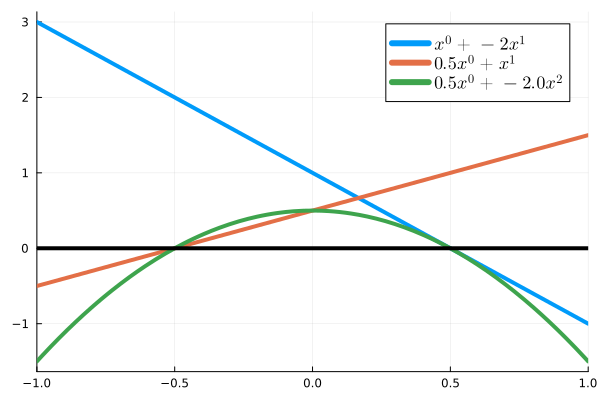

In [125]:
plot()
p = [1 -2]
q = [.5 1]
polyplot(p)
polyplot(q)
polyplot(polymul(p, q))
plot!(x -> 0, color=:black, label=nothing)

## Addition and subtraction

We need to be able to add and subtract polynomials, that is, to compute $r = p + q$ and $r = p - q$.
This is just entry-wise addition and subtraction, except that the vectors may have different lengths.

In [126]:
# addition of polynomials
function polyadd(p, q)
    p = reshape(p, :)
    q = reshape(q, :)
    n = max(length(p), length(q))
    r = zeros(n)
    r[1:length(p)] = p
    r[1:length(q)] += q
    reshape(r, 1, :)
end

polyadd([1 2 3], [10 20])

1×3 Matrix{Float64}:
 11.0  22.0  3.0

In [127]:
# subtraction of polynomials
function polysub(p, q)
    p = reshape(p, :)
    q = reshape(q, :)
    n = max(length(p), length(q))
    r = zeros(n)
    r[1:length(p)] = p
    r[1:length(q)] -= q
    reshape(r, 1, :)
end

polysub([1 2 3], [10 20])

1×3 Matrix{Float64}:
 -9.0  -18.0  3.0

## Ex 2. Inner products of polynomials (15%)

We will use the $L^2$ inner product,

$$ \left\langle u, v \right\rangle = \int_{-1}^{1} u \left( x \right) v \left( x \right) dx $$

restricted to the case where $u \left( x \right)$ and $ v \left( x \right)$ are polynomials.

<br>

Recall the [Fundamental Theorem of Calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus), which says that

$$ \int_a^b f \left( x \right) = F \left( b \right) - F \left( a \right) $$

where $F$ is a function such that $F' \left( x \right) = f \left( x \right)$.

In [128]:
function poly_inner_product(u, v)
    """Use polymul, polyint, and polyval to define the L2
    inner product of u and v on the interval (-1, 1). Both u and v
    are polynomials expressed as arrays in the usual way. Recall that
    the inner product returns a scalar (single number).
    """
    ### SOLUTION BEGIN
    # ⟨u,v⟩ = ∫_{-1}^1 u(x)v(x) dx = F(1) - F(-1),
    # where F = ∫ (u*v)
    w = polymul(u, v)
    F = polyint(w)
    polyval(F, 1) - polyval(F, -1)
    ### SOLUTION END
end

function display_inner_product(u, v)
    display("text/latex", "\$ \\langle $(polystring(u)), $(polystring(v)) \\rangle = $(poly_inner_product(u, v)) \$")
end
poly_inner_product([1], [0 1])
display_inner_product([1], [0 1])
display_inner_product([0 0 1], [1])

In [129]:
# Tests:
@test poly_inner_product([-1 0 3], [1]) ≈ 0
@test poly_inner_product([-1 0 3], [0 -3 0 5]) ≈ 0
@test poly_inner_product([0 1], [0 -3 0 5]) ≈ 0
@test poly_inner_product([1 2 3], [1 3 0 4]) ≈ 11.2

Test Passed

## Ex 3. Norms of polynomials (10%)

Recall that an inner product **induces** a norm.
We'll define it now and use it later to normalize polynomials.

In [130]:
function poly_norm(p)
    """Compute the norm of the polynomial p(x) induced by poly_inner_product().
    """
    ### SOLUTION BEGIN
    sqrt(poly_inner_product(p, p))
    ### SOLUTION END
end

poly_norm (generic function with 1 method)

In [131]:
# Tests:
@test poly_norm([1]) ≈ sqrt(2)
@test poly_norm([0 1]) ≈ sqrt(2/3)
@test poly_norm([-1 0 3]) ≈ sqrt(8/5)

Test Passed

## Orthogonalization of polynomials

We now have the ingredients to use the Gram-Schmidt algorithm to orgthogonalize polynomials (starting with the monomials) with respect to the $L^2$ inner product.
We start by defining a "matrix" in which each of the columns is a polynomial.
This is conceptually similar to a Vandermonde matrix (see `vander()`) in the limit where we evaluate at infinitely many points; instead of storing infinitely tall columns, we store each as a list defining the polynomial.

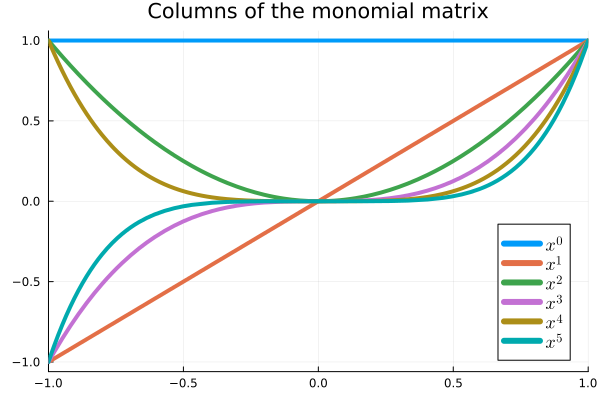

In [132]:
function monomials(n)
    """Return a list of the first n monomials in order of increasing degree (the canonical basis).
    We will think of this as a "tall" matrix indexed by its n columns.
    Each column contains a polynomial defined by its coefficient.
    """
    A = []
    for j in 1:n
        p = zeros(j)
        p[end] = 1
        push!(A, p)
    end
    A
end

plot(title="Columns of the monomial matrix")
for (j, p) in enumerate(monomials(6))
    polydisp("p_$j", p)
    polyplot(p)
end
plot!()

## Projections

Polynomials can be projected just like vectors.
For example, if $q \left( x \right)$ is normalized,

$$ q \left\langle q, p \right\rangle $$

is the orthogonal projection of $p$ into the subspace of $q$ and

$$ p - q \left\langle q, p \right\rangle $$

is the part orthogonal to $q$.

<br>

Notice the similarities between the expressions above (involving the $L^2$ inner product) and those for projections of finite-dimensional vectors, $q q^T p$ and $\left( I - q q^T \right) p$.

In [133]:
function poly_project_orthog(p, q)
    """Find the component of p(x) that is orthogonal to the normalized
    polynomial q(x).
    """
    c = poly_inner_product(p, q) # length of p in direction q
    # polysub is just subtraction of arrays, but lines them up correctly
    # in case they are different lengths
    polysub(p, q * c) # p - q c
end

function test_project()
    A = monomials(5)
    plot()
    polyplot(A[2])                      # x
    polyplot(A[4])                      # x^3
    display_inner_product(A[2], A[4])
    p1 = A[2] / poly_norm(A[2])         # Normalize x in L^2 norm
    display("text/latex", "\$ \\lVert p_1 \\rVert = $(poly_norm(p1)) \$")
    polyplot(p1)
    p3 = poly_project_orthog(A[4], p1)  # Find component of x^3 that is orthogonal to x
    polyplot(p3)
    display_inner_product(A[2], p3)
end

test_project()

## Polynomial matrix multiplication

In class, we have discussed the matrix product $A x$ being a linear combination of the columns of $A$.

If $A$ is a polynomial matrix with $m$ columns (we'll say it has shape `(*, m)`), then

$$ A(x) = A \mathbf{x} = \sum_i A_{i} x^i $$

Similarly, if $B$ is a $m \times n$ matrix (i.e. shape `(m, n)`), then the $j$-th column of $C = A B$ is

$$ C_{:, j} = \sum_k A_{:, k} B_{k, j} $$

The matrix $C$ is also a polynomial matrix, now with shape `(*, n)`.

In [134]:
function poly_matmul(A, B)
    """Multiply a polynomial matrix A of shape (*,m) times
    a matrix B of shape (m,n) to yield a polynomial matrix
    C of shape (*,n).
    """
    C = []
    m, n = size(B);
    for j in 1:n
        # We use polyadd to compute A * B[*,j] and
        # append it to C using push!(C, new_col)
        new_col = zeros(length(A[j]))
        for i in 1:m
            if B[i, j] != 0
                new_col = polyadd(new_col, A[i] .* B[i, j])
            end
        end
        push!(C, new_col)
    end
    C
end

C = poly_matmul(monomials(4), [1 0 0; 0 1 0; 0 0 1; 0 0 0])

polydisp("C_{:,1}", C[1])
polydisp("C_{:,2}", C[2])
polydisp("C_{:,3}", C[3])
@show C
@show C[1]  # The polynomial 1
@show C[2]  # The polynomial x
@show C[3]; # The polynomial x^2

C = Any[[1.0;;], [0.0 1.0], [0.0 0.0 1.0]]
C[1] = [1.0;;]
C[2] = [0.0 1.0]
C[3] = [0.0 0.0 1.0]


In [135]:
A = monomials(4)
@show size(A)
B = reshape(0:7, 2, 4)'
@show size(B)
@show C = poly_matmul(A, B)
Cref = [[0 2 4 6], [1 3 5 7]]
@test C[1] ≈ Cref[1]
@test C[2] ≈ Cref[2]

size(A) = (4,)
size(B) = (4, 2)
C = poly_matmul(A, B) = Any[[0.0 2.0 4.0 6.0], [1.0 3.0 5.0 7.0]]


Test Passed

## E.C. #1 (+5%)
In your own words, describe what the `poly_matmul` function does and how it works. Be as specific as possible about the internal representations of objects (e.g., whether they are column-vectors, row-vectors, what their size is, etc.) and operations performed.

**Solution**:
- The `poly_matmul` function performs the product $C=AB$ where
    * $A$ is a polynomial matrix represented as a Julia Vector of length $m$, where each element A[i] is a vector of variable-length coefficients for a single polynomial (which represents a polynomial of degree at most `*`). The shape of $A$ is `(*,m)` mathematically, where `*` is of variable, increasing length for each monomial basis term. That is, the first element of the Vector $A$ has length 1 (representing the first column of $A$, the constant basis term), the second element has length 2 (representing the second column of $A$, the linear basis term), the third element has length 3 (representing the third column of $A$, the quadratic basis term), and so on.
    * $B$ is a standard `(m, n)` Julia Matrix containing scalar values.
    - $C$, the output, is a new polynomial matrix, similar to $A$, but of length $n$. The shape of $C$ is then `(*,n)`.
- Internally, the `poly_matmul` function calls the `polyadd` function, which aligns coefficient lengths, adds polynomials term-by-term, and returns a row-vector.
- If `B[i, j]=0` we skip the multiplication, so that the `polyadd` function does not add trailing zeros to the resulting columns of $C$.
- Each output polynomial (i.e., each column of $C$) is a linear combination of columns of $A$, where the coefficients of the linear combinations are given by the columns of $B$.


## Ex 4. QR factorization of monomials (30%)

We can apply the Gram-Schmidt process to compute a QR factorization of the monomials.
This will yield an orthogonal basis of polynomials.

In [136]:
function poly_qr(A)
    """Without using library functions, compute a reduced QR factorization of the polynomials in the columns of A
    using the Gram-Schmidt algorithm. If A has shape (*,n), the factor Q will have 
    shape (*,n) (i.e., a list of polynomials as vectors) and R will be a square (n,n)
    triangular matrix.
    
    This algorithm can look line-for-line like the naive Gram-Schmidt in our class
    notebook, but you'll need to use the appropriate functions that act on polynomials,
    an ensure you are accessing columns. That is, when working with polynomial matrices 
    (shape (*,n)), column j is accessed as A[j] instead of A[:,j] for traditional matrices.
    """
    Q = []
    n = length(A)
    R = zeros(n, n)
    for j in 1:n # Each column of A and R
        ### SOLUTION BEGIN
        v = A[j]
        for k in 1:j-1
            r = poly_inner_product(Q[k], v) # ⟨q_i, v⟩
            v = polysub(v, Q[k] * r)        # v ← v − q_i * ⟨q_i, v⟩
            R[k, j] = r
        end
        R[j,j] = poly_norm(v)
        push!(Q, v / R[j,j])
        ### SOLUTION END
    end
    Q, R
end

Q, R = poly_qr(monomials(4))
for (j, col) in enumerate(Q)
    polydisp("q_{$j}", col)
end
R

4×4 Matrix{Float64}:
 1.41421  0.0       0.471405  0.0
 0.0      0.816497  0.0       0.489898
 0.0      0.0       0.421637  0.0
 0.0      0.0       0.0       0.213809

In [137]:
## This cell explores some properties of the factorization, and its output
## may be helpful in debugging your implementation above.

function poly_QtQ(Q)
    """Compute Q.T Q where Q is a matrix of polynomials
    expressed as a list of columns. The result is an ordinary
    square matrix.
    """
    n = length(Q)
    A = zeros(n, n)
    for i in 1:n
        for j in 1:n
            A[i,j] = poly_inner_product(Q[i], Q[j])
        end
    end
    A
end

function poly_matsub(A, B)
    """Compute A - B where A and B are matrices of polynomials
    expressed as lists of columns.
    """
    C = []
    for i in 1:length(A)
        push!(C, polysub(A[i], B[i]))
    end
    C
end

A = monomials(3)
Q, R = poly_qr(A)
@show size(Q)
@show size(R)
QtQ = poly_QtQ(Q)
@show QtQ
@show size(poly_matmul(Q, R))
@show size(A)
poly_matsub(poly_matmul(Q, R), A)
QR_minus_A = poly_matsub(poly_matmul(Q, R), A)
@show QR_minus_A
@show norm(QtQ - I)
@show norm(QR_minus_A)
@test norm(QtQ - I) < 1e-12
@test norm(QR_minus_A) < 1e-12

size(Q) = (3,)
size(R) = (3, 3)
QtQ = [0.9999999999999998 0.0 2.220446049250313e-16; 0.0 0.9999999999999999 0.0; 2.220446049250313e-16 0.0 1.0]
size(poly_matmul(Q, R)) = (3,)
size(A) = (3,)
QR_minus_A = Any[[0.0;;], [0.0 -1.1102230246251565e-16], [0.0 0.0 0.0]]
norm(QtQ - I) = 4.002966042486721e-16
norm(QR_minus_A) = 1.1102230246251565e-16


Test Passed

In [138]:
# The Q factor loses orthogonality as the maximum degree is increased.
# This is much the same effect as we've observed with Vandermonde matrices
# in class, and part of the motivation for the Householder algorithm.

A = monomials(15)
Q, R = poly_qr(A)
QtQ = poly_QtQ(Q)
QR_minus_A = poly_matsub(poly_matmul(Q, R), A)
@show norm(QtQ - I)
@show norm(QR_minus_A);

norm(QtQ - I) = 7.642411252910222e-8
norm(QR_minus_A) = 2.7894008272968645e-16


## Plot the orthogonal polynomials

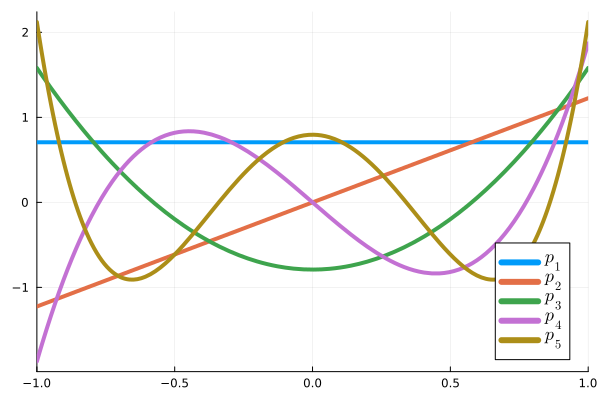

In [139]:
function poly_plotmat(A)
    handle = plot() # Create new figure
    for (j, p) in enumerate(A)
        polyplot(p; label="p_{$j}")
    end
    handle
end

Q, _ = poly_qr(monomials(5))
poly_plotmat(Q)

## 5. Normalization (30%)

Our QR factorization is normalized using the $L^2$ norm, which is just fine mathematically, but perhaps not visually satisfying.

<br>

This set of polynomials is famous ([Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials)), but with the normalization $p \left( 1 \right) = 1$ instead of the $L^2$ normalization $\left\langle p \left( x \right), p \left( x \right) \right\rangle = 1$.
Let's convert our $QR$ factorization to use this different normalization convention.

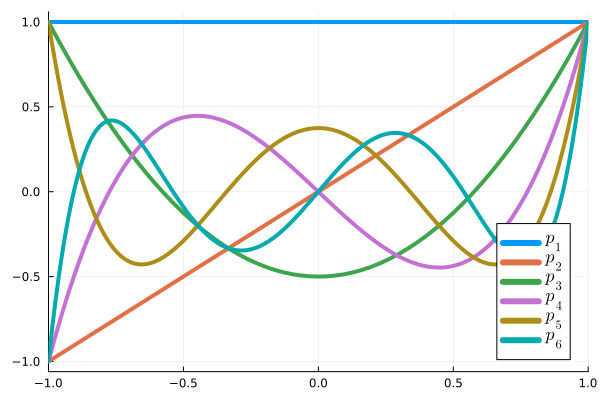

In [140]:
function poly_qr_norm1(A)
    """Compute a QR factorization with the normalization convention that
    q(1) = 1 for each column of Q.  This can be constructed by modifying
    the standard QR factorization (scaling the columns of Q and absorbing
    that scaling factor into R).
    
    The resulting matrix Q should have columns that are orthogonal with 
    respect to the L^2 inner product, but they will not be normalized with
    respect to that product.  Consequently, Q^T Q will be diagonal, but
    not the identity.
    
    The factors should still satisfy Q R = A.
    """
    Q, R = poly_qr(A)
    n, _ = size(R)
    # Loop over columns of Q (and rows of R).
    # Use polyval() to evaluate each column at x=1 and use that
    # normalization to scale the column of Q and corresponding entries
    # of R. The new columns of Q should be orthogonal, but will not, in
    # general, have norm 1.  This means Q^T Q will be diagonal, but not
    # the identity.  Q R = A should still be satisfied.
    ### SOLUTION BEGIN
    for j in 1:n
        s = polyval(Q[j], 1)          # Evaluate Q[i] at x=1
        Q[j] = Q[j] / s               # scale column of Q so that Q[i](1) = 1
        R[j, :] .= R[j, :] * s        # compensate in R so that Q*R = A
    end
    ### SOLUTION END
    Q, R
end
    
Q, R = poly_qr_norm1(monomials(6))
poly_plotmat(Q)

In [141]:
Q, R = poly_qr_norm1(monomials(6))
diag(poly_QtQ(Q))'

1×6 adjoint(::Vector{Float64}) with eltype Float64:
 2.0  0.666667  0.4  0.285714  0.222222  0.181818

In [142]:
# There is an analytic formula for this normalizing factor
[2 / (2*i+1) for i in 0:5]'

1×6 adjoint(::Vector{Float64}) with eltype Float64:
 2.0  0.666667  0.4  0.285714  0.222222  0.181818

## Recurrence relation

Although there is also structure in the factor $R$, we are often interested only in the basis $Q$.
Let us test whether our functions, the columns of $Q$ (with our new normalization convention), satisfy the recurrence relation

$$ \left( n + 1 \right) q_{n + 1} \left( x \right) = \left( 2 n + 1 \right) x q_n \left( x \right) - n q_{n - 1} \left( x \right) $$

The above uses the standard convention that $q_n$ is a polynomial of degree $n$, but we're using Julia's 1-based indexing so our $q_n$ is a polynomial of degree $n - 1$.
As such, we'll rewrite the standard recurrence as

$$ \left( n + 1 \right) q_{n + 2} \left( x \right) = \left( 2 n + 1 \right) x q_{n + 1} \left( x \right) - n q_n \left( x \right) $$

In [143]:
for n in 1:length(Q)-2
    term = (2*n+1) * polymul([0 1], Q[n+1])
    rhs = polysub(term, n*Q[n])
    lhs = (n+1)*Q[n+2]
    err = poly_norm(polysub(rhs, lhs))
    @show err
end

err = 4.586533637279209e-16
err = 4.065527543213883e-16
err = 1.572483160424228e-15
err = 1.3472681166377224e-14


## E.C. #2 (+5%)

This recurrence is faster and more stable to evaluate than applying Gram-Schmidt to the monomials.
We can use it to create a generalized Vandermonde matrix in which the columns are Legendre polynomials instead of the monomials.
This matrix will look like

$$ Q = \left[ q_0 \left( x \right) \vert q_1 \left( x \right) \vert q_2 \left( x \right) \vert \cdots \right] $$

Use the recurrence to compute this Vandermonde matrix.

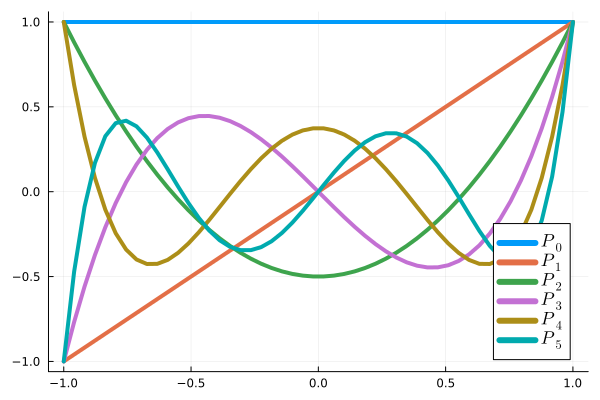

In [144]:
function vander_legendre(x, k=nothing)
    if isnothing(k)
        k = length(x) # Square by default
    end
    m = length(x)
    Q = ones(m, k)
    Q[:, 2] = x
    for n in 1:k-2
        # Use the recurrence to compute Q[:,n+1] from Q[:,n] and Q[:,n-1].
        ### SOLUTION BEGIN
        # Using 0-based degrees:
        # (n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x)
        # Our columns are 1-based: Q[:, n] ≡ P_{n-1}, Q[:, n+1] ≡ P_n, etc.
        Q[:, n+2] = ((2n + 1) .* x .* Q[:, n+1] .- n .* Q[:, n]) ./ (n + 1)
        ### SOLUTION END
    end
    Q
end

x = LinRange(-1, 1, 50)
Q = vander_legendre(x, 6)
plot(x, Q, label=["\$P_{$j}\$" for j in (0:5)'])

In both the standard Vandermonde matrix (`vander`) and our Legendre variant, column $j$ is a polynomial of degree $j - 1$ evaluated at the points $x$.
The columns span the same space (i.e., the matrices have the same range).
Let's compare the condition number of these matrices on a set of 50 evenly-spaced points on the interval $\left[ -1 , \right]$.
Recall that small condition numbers are desirable for numerical stability.

In [145]:
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x) # Square by default
    end
    m = length(x)
    P = ones(m, k)
    P[:, 2] = x
    for n in 1:k-1
        P[:, n+1] = x .* P[:, n]
    end
    P
end

@show cond(vander(x, 20))
@show cond(vander_legendre(x, 20));

cond(vander(x, 20)) = 8.594893556142587e6
cond(vander_legendre(x, 20)) = 8.371119590296562


## Outlook

* This set of orthogonal polynomials is an alternative basis to polynomials, and much more attractive for approximating functions, due to better conditioning and the convenience of orthogonality (when handling continuous functions).

* The recurrence provides a computationally efficient and numerically stable procedure for evaluating the polynomials of any degree.

* The zeros of these orthogonal polynomials are particularly significant for representing functions and for numerical integration (more on this later in class).

* These zeros can be computed efficiently using Newton's method and a carefully chosen initial guess.
(They can also be computed by solving an eigenvalue problem.)